In [1]:
#tests.py

import unittest
import error_functions as ef

class TestErrorFunctions(unittest.TestCase):
    def test_linex_loss_on_tuple(self):
        self.assertAlmostEqual(ef.linex_loss_on_tuple(0, 0), 0)
        self.assertAlmostEqual(ef.linex_loss_on_tuple(17, 17), 0)
        self.assertAlmostEqual(ef.linex_loss_on_tuple(1, 0), 0.004837418)
        self.assertAlmostEqual(ef.linex_loss_on_tuple(3.7, 17.2), 1.5074255306)


    def test_linex_loss(self):
        self.assertAlmostEqual(ef.linex_loss([0], [0]), 0)
        self.assertAlmostEqual(ef.linex_loss([3.7], [17.2]), 1.5074255306)
        self.assertRaises(Exception, ef.linex_loss, [0, 0], [0, 0, 10])
        self.assertAlmostEqual(ef.linex_loss([0, 0], [0, 0]), 0)
        self.assertAlmostEqual(ef.linex_loss([0, 3.7], [0, 17.2]), 1.5074255306)



if __name__ == '__main__':
    unittest.main()


E
ERROR: C:\Users\Raphael\AppData\Roaming\jupyter\runtime\kernel-411c3926-016e-45e4-9f76-5d1da81ce3de (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\Raphael\AppData\Roaming\jupyter\runtime\kernel-411c3926-016e-45e4-9f76-5d1da81ce3de'

----------------------------------------------------------------------
Ran 1 test in 0.006s

FAILED (errors=1)


SystemExit: True

C:\Users\Raphael\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
##### pre_processing.py
import pandas as pd
import numpy as np

print('Start reading file')
df = pd.read_csv('data/train.csv', delimiter=';', nrows = 100000)

print(df.shape)

s=0
#l=len(pd.read_csv('data/train.csv').values)

#sum(1 for row in pd.read_csv('data/train.csv'))
column_names=df.columns.tolist()


In [ ]:
#print(df.mean(axis=0))
#print(df.std(axis=0))
means=df.mean(axis=0)
print("Means computed.")
st_dev=df.std(axis=0)
print("StDev computed.")

#Find useless values
l_useless=[]
for c in column_names:
    print(c, means[c], st_dev[c])

In [4]:
#Clean dataset
df_clean=df
for u in l_useless:
    df_clean=df_clean.drop(u,axis=1)
    
df_clean=df_clean.drop('ASS_COMENT',axis=1)

#Columns
col_clean=df_clean.columns.tolist()

#Remove null_values
for c in col_clean:
    if (sum(pd.isnull(df_clean[c]))==len(df_clean[c])):
        df_clean=df_clean.drop(c,axis=1)

#Columns
col_clean=df_clean.columns.tolist()
       
for c in col_clean:
    if type(df_clean[c][0])==str:
        ll=[]
        for i in range(len(df_clean[c])):
            if df_clean[c][i] not in ll:
                ll.append(df_clean[c][i])
            

{0: (0.0, 0, 0), 1: (0.04, 0, 0), 2: (0.08, 0, 0), 3: (0.12, 0, 0), 4: (0.16, 0, 0), 5: (0.2, 0, 0), 6: (0.24, 0, 0), 7: (0.28, 0, 0), 8: (0.32, 0, 0), 9: (0.36, 0, 0), 10: (0.4, 0, 0), 11: (0.44, 0, 0), 12: (0.48, 0, 0), 13: (0.52, 0, 0), 14: (0.56, 0, 0), 15: (0.6, 0, 0), 16: (0.64, 0, 0), 17: (0.68, 0, 0), 18: (0.72, 0, 0), 19: (0.76, 0, 0), 20: (0.8, 0, 0), 21: (0.84, 0, 0), 22: (0.88, 0, 0), 25: (1.0, 0, 0)}
[ 0.91226373  0.05997979]


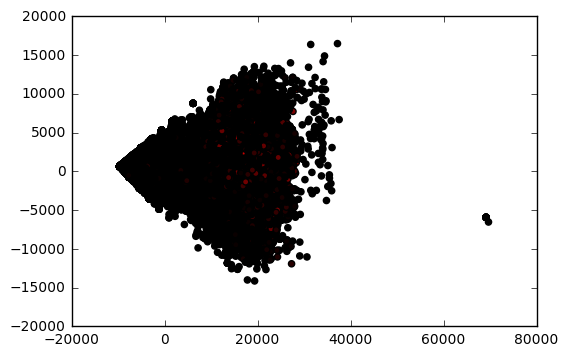

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import *

#print(col_clean)


data=df_clean.values.T
data_num=[data[len(data)-5]]

for d in data:
    if(type(d[0])!=str and not pd.isnull(d[0])):
        data_num.append(d)

del data_num[len(data_num)-5]

X_tofit=np.array(data_num[1:len(data_num)]).T
pca=PCA(n_components=2)
Z=pca.fit_transform(X_tofit)


x_plot=[x[0] for x in Z]
y_plot=[y[1] for y in Z]

l_label=[]
for i in data_num[0]:
    if not i in l_label:
        l_label.append(i)
LABEL_COLOR_MAP = {i : (0*(i>0)+i/max(l_label), 0, 0) for i in l_label
    }
print(LABEL_COLOR_MAP)
label_color = [LABEL_COLOR_MAP[l] for l in data_num[0]]

print(pca.explained_variance_ratio_)

plt.scatter(x_plot,y_plot,c=label_color)
plt.show()

In [7]:
y=df_clean['CSPL_CALLS'].values
df_clean.drop('CSPL_CALLS',axis=1)
df_tr=df_clean.values
df_tr2=[]

for i in range(len(df_tr.T)):
    if(type(df_tr.T[i][0])==str):
        d=pd.get_dummies(df_tr.T[i]).values.T
        for d2 in d:
            df_tr2.append(d2)
    else:
        df_tr2.append(df_tr.T[i])

df_tr2=np.array(df_tr2)


X2=df_tr2.T


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

S=Ridge()
S.fit(X_train,y_train)
y2=S.predict(X_test)
sum(abs(y2-y_test))/len(y2)

4.0948717325679773e-05

In [11]:
import error_functions as ef

ef.linex_loss(y2, y_test)

2.8941672778448613e-05

In [15]:
X_train.shape

(80000, 1688)